In [ ]:
#inspired from
#https://www.kaggle.com/haightdj/house-price-prediction-top-10-xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
#Load datasets
df_train=pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_train.shape

(8523, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Load datasets
df_test=pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_AbJTz2l.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
df_test.shape

(5681, 11)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
# Display vars that have 1 or more missing data points
print('Training Data:')
print(df_train.isnull().sum().sort_values(ascending=False).head(20))# display top categories with missing data
print('---------------------------')
print('Test Data:')
print(df_test.isnull().sum().sort_values(ascending=False).head(35)) # check in Test data too so you don't build model around vars that don't exist

Training Data:
Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64
---------------------------
Test Data:
Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64


In [ ]:
train_quan=df_train.drop('Item_Identifier', axis=1)
test_quan=df_test.drop('Item_Identifier', axis=1)

In [ ]:
train_quan

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
test_quan

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
train_quan = list( (df_train.loc[:,df_train.dtypes != 'object']).columns.values )
train_qual = list( df_train.loc[:,df_train.dtypes == 'object'].columns.values )

test_quan = list(( df_test.loc[:,df_test.dtypes != 'object']).columns.values )
test_qual = list( df_test.loc[:,df_test.dtypes == 'object'].columns.values )

train_data_imputed = df_train.copy()
test_data_imputed = df_test.copy()

In [1]:
# Impute quantitative data
# Others we will fill with the mean using Imputer:
quan_imputer = SimpleImputer()
train_quan_imputed = quan_imputer.fit_transform(train_data_imputed[train_quan]) # ... this changes it from DataFrame to ndarray
test_quan_imputed = quan_imputer.fit_transform(test_data_imputed[test_quan])

train_quan_imputed = pd.DataFrame(data=train_quan_imputed,columns=train_quan) #This converts back to a dataframe
test_quan_imputed = pd.DataFrame(data=test_quan_imputed,columns=test_quan)

# Impute Qualitative data (I don't have SimpleImputer... so we will do manually for selected vars)

# Filling missing values for categorical features# Filli 
train_data_imputed.Outlet_Size.fillna(train_data_imputed.Outlet_Size.mode()[0], inplace=True)  # Replace with mode
train_data_imputed.Item_Weight.fillna(train_data_imputed.Outlet_Size.median()), inplace=True) #replace with median

test_data_imputed.Outlet_Size.fillna(test_data_imputed.Outlet_Size.mode()[0], inplace=True)  # Replace with mode 
test_data_imputed.Item_Weight.fillna(test_data_imputed.Outlet_Size.median()), inplace=True) # replace with median


# convert qual data back into dataframe
train_qual_imputed = train_data_imputed[train_qual]
test_qual_imputed = test_data_imputed[test_qual]

# Combine imputed quan, qual data into single data frames... already edited home_data_imputed?

SyntaxError: ignored

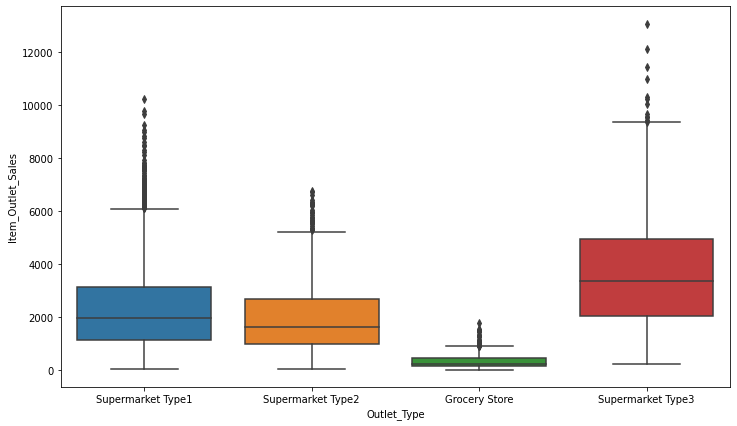

In [ ]:
# Lets also Manually encode some importand variables that may have too many dimensions for one-hot encoding
# Outlet Type:
plt.figure(figsize=(12,7))
sns.boxplot(x = train_data_imputed['Outlet_Type'], y = train_data_imputed['Item_Outlet_Sales'])

In [ ]:
y = train_data_imputed.Item_Outlet_Sales

mu = 2,181.29 and sigma = 1,706.40


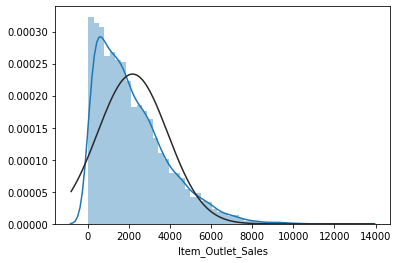

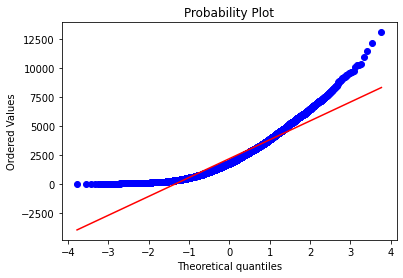

transformed mu = 7.30 and transformed sigma = 1.02


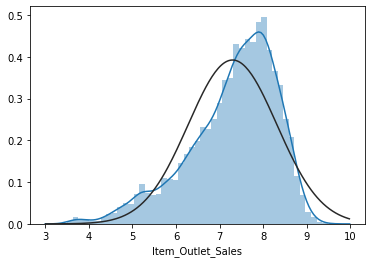

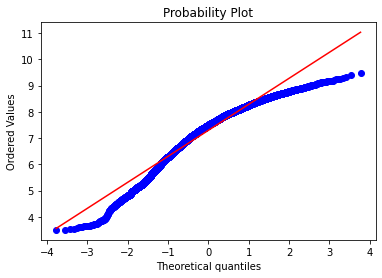

0    8.225540
1    6.094524
2    7.648392
3    6.596300
4    6.902446
5    6.321863
6    5.839341
7    8.299724
8    6.981562
9    8.457557
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Distribution Plot:
sns.distplot(train_data_imputed['Item_Outlet_Sales'], fit = norm)
(mu, sigma) = norm.fit(train_data_imputed['Item_Outlet_Sales'])
print('mu = {:,.2f} and sigma = {:,.2f}'.format(mu, sigma))
# Q-Q plot:
fig = plt.figure()
res = stats.probplot(train_data_imputed['Item_Outlet_Sales'], plot=plt)
plt.show()

# Apply Log transform to SalePrice (y in training data)
y = np.log(y)
# Distribution Plot
sns.distplot(y, fit = norm)
(mu, sigma) = norm.fit(y)
print('transformed mu = {:,.2f} and transformed sigma = {:,.2f}'.format(mu, sigma))
# QQ Plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

y.head(10)

In [ ]:
# Create X
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'] 

cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

all_features = features + cat_features # add new categorical features (so as not to break the sections before)
X = train_data_imputed.copy()[all_features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

test_X = test_data_imputed.copy()[all_features]

In [ ]:
# One Hot Encode the Categorical Variables
low_cardinality_cols_train = [cname for cname in train_X.columns if 
                                train_X[cname].nunique() < 30 and
                                train_X[cname].dtype == "object"] # eligible to be one-hot encoded if it is type object and <10 unique values
numeric_cols_train = [cname for cname in train_X.columns if 
                                train_X[cname].dtype in ['int64', 'float64']] # numerical data if integer or float

my_cols_train = low_cardinality_cols_train + numeric_cols_train
#my_cols_val = low_cardinality_cols_val + numeric_cols_val
#print(my_cols_train)

train_predictors = train_X[my_cols_train]
val_predictors = val_X[my_cols_train] #no need to include any columns that don't exist in training set?

# One-hot Encode Categorical data for trianing and validation sets. include only data that exists in both
one_hot_train_predictors = pd.get_dummies(train_predictors)
one_hot_val_predictors = pd.get_dummies(val_predictors)
one_hot_train_X, one_hot_val_X = one_hot_train_predictors.align(one_hot_val_predictors,
                                                                   join='inner', 
                                                                    axis=1)
one_hot_X = one_hot_train_X.append(one_hot_val_X) # Train from this!!! (with y)

# One Hot Encode Test data for contest submission:
test_predictors = test_X[my_cols_train]
one_hot_test_predictors = pd.get_dummies(test_predictors)

In [ ]:
# Initial Pass:
my_XGB_model = XGBRegressor()
my_XGB_model.fit(one_hot_train_X, train_y, verbose=False)

# make predictions
XGB_predictions = my_XGB_model.predict(one_hot_val_X)
XGB_predictions = np.exp(XGB_predictions)
# Print MAE for initial XGB model
XGB_mae = mean_absolute_error(XGB_predictions, np.exp(val_y))
print("Validation MAE for XGBoost Model : " + str(XGB_mae))
      
# Additional Passes
my_XGB_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_XGB_model.fit(one_hot_train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(one_hot_val_X, val_y)], verbose=False)
XGB_predictions = my_XGB_model.predict(one_hot_val_X)
XGB_predictions = np.exp(XGB_predictions)
XGB_mult_mae = mean_absolute_error(XGB_predictions, np.exp(val_y))
print("Validation MAE for multi-pass XGBoost Model : " + str(XGB_mult_mae))

# Predict Price on Test Data:
final_predictions = my_XGB_model.predict(one_hot_test_predictors)
final_predictions = np.exp(final_predictions)

print('\n\n ---------------------------------------- \n\n')
print(final_predictions)

[20:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MAE for XGBoost Model : 766.5232260749721
[20:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MAE for multi-pass XGBoost Model : 768.1427056003064


 ---------------------------------------- 


[1507.8549 1201.758   496.2898 ... 1612.7521 3170.5876 1042.6249]


In [ ]:
#Load sample submission
df_sample=pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")
df_sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [ ]:
output = pd.DataFrame({'Item_Identifier': df_test.Item_Identifier,'Outlet_Identifier': df_test.Outlet_Identifier,
                       'Item_Outlet_Sales': final_predictions})
output.to_csv('submission.csv', index=False)
output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1507.854858
1,FDW14,OUT017,1201.758057
2,NCN55,OUT010,496.289795
3,FDQ58,OUT017,2191.637451
4,FDY38,OUT027,5187.986816
...,...,...,...
5676,FDB58,OUT046,1868.760254
5677,FDD47,OUT018,2167.509277
5678,NCO17,OUT045,1612.752075
5679,FDJ26,OUT017,3170.587646
